
# Data Science:

### DESCRIPTION:
#### Diabetes is a type of chronic disease which is more common among the people of all age groups.Predicting this disease at an early stage can help a person to take the necessary precautions and change his/her lifestyle accordingly to either prevent the occurrence of this disease or control the disease.
#### TASK:              
#### 1.Prepare the dataset using several methods to train the model.                
#### 2.Build a model which can give high accuracy of predicting the disease.Diabetes is a type of chronic disease which is more common among the people of all age groups.Predicting this disease at an early stage can help a person to take the necessary precautions and change his/her lifestyle accordingly to either prevent the occurrence of this disease or control the disease.

#### Dataset :- https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset


In [1]:
from tensorflow.keras.layers import Input,ReLU,GRU,Bidirectional,Dense
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from kerastuner.tuners import RandomSearch

Using TensorFlow backend


In [2]:
df = pd.read_csv('/Users/asaifali/Downloads/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.shape

(100000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: xlabel='diabetes', ylabel='count'>

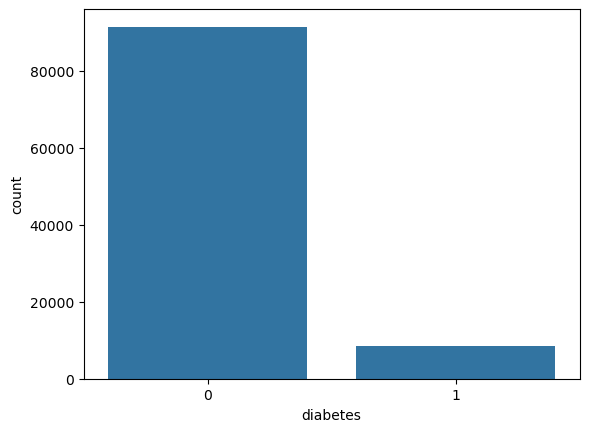

In [8]:
sns.countplot(x='diabetes' , data=df)

<Axes: xlabel='hypertension', ylabel='count'>

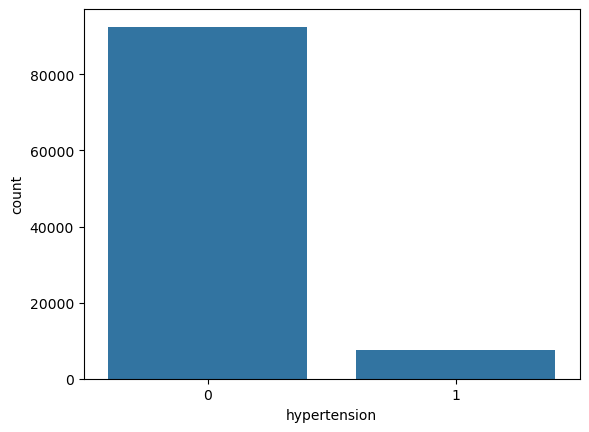

In [9]:
sns.countplot(x='hypertension' , data=df)

<Axes: xlabel='heart_disease', ylabel='count'>

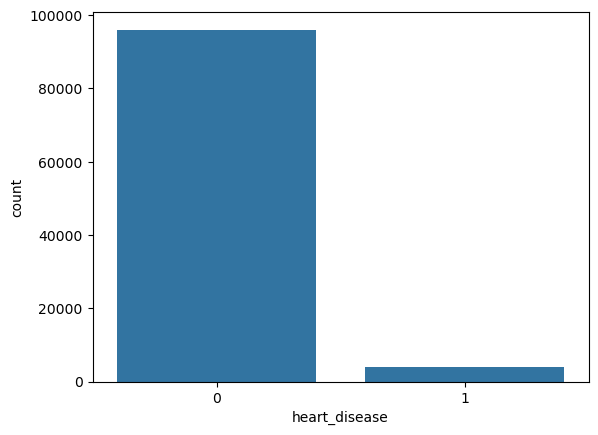

In [10]:
sns.countplot(x='heart_disease' , data=df)

<Axes: xlabel='gender', ylabel='count'>

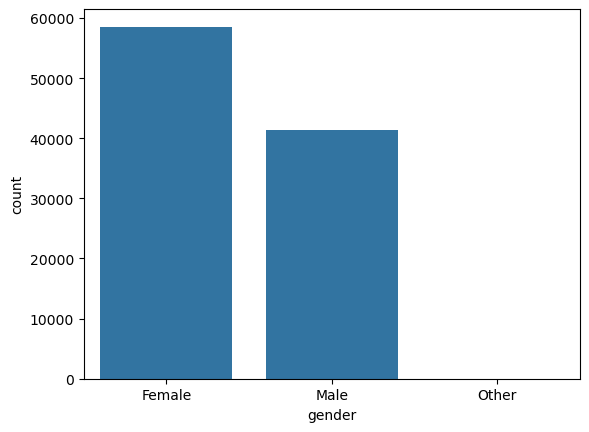

In [11]:
sns.countplot(x='gender' , data=df)

<Axes: xlabel='smoking_history', ylabel='count'>

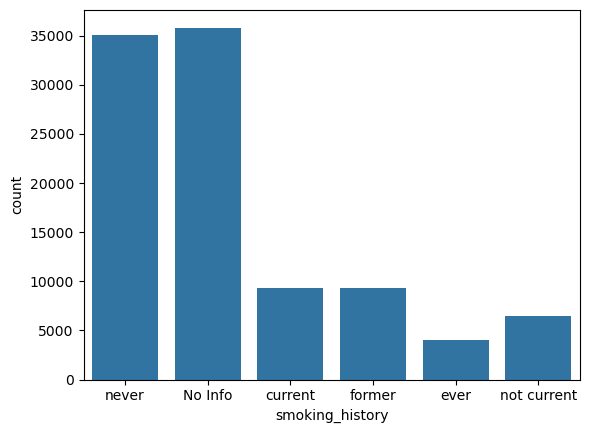

In [12]:
sns.countplot(x='smoking_history' , data=df)

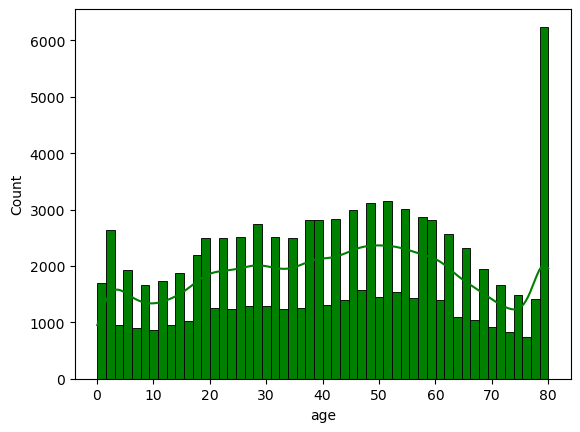

In [13]:
sns.histplot(x="age",data = df,color="green", alpha = 1.0,kde = True)
plt.show()

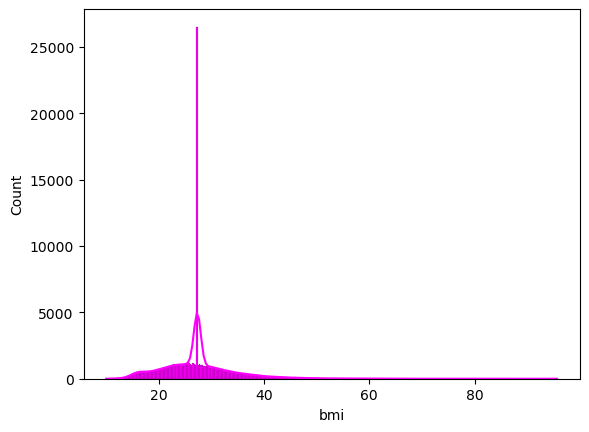

In [14]:
sns.histplot(x="bmi",data = df,color="magenta", alpha = 1.0,kde = True)
plt.show()

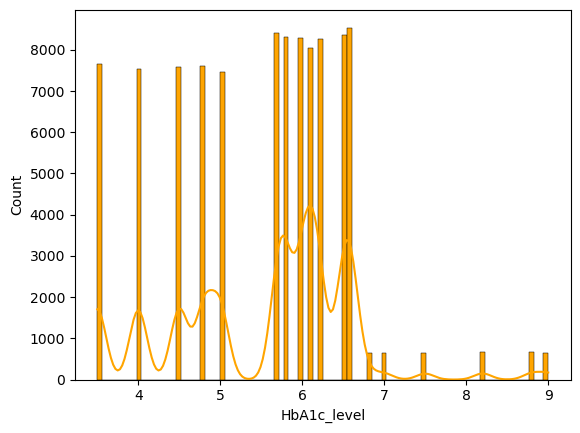

In [15]:
sns.histplot(x="HbA1c_level",data = df,color="orange", alpha = 1.0,kde = True)
plt.show()

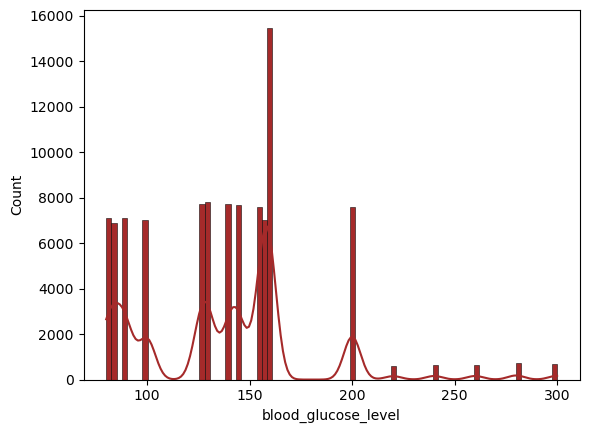

In [16]:
sns.histplot(x="blood_glucose_level",data = df,color="brown", alpha = 1.0,kde = True)
plt.show()

In [17]:
# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the categorical column
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

# Display the updated DataFrame
print(df.head())

   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


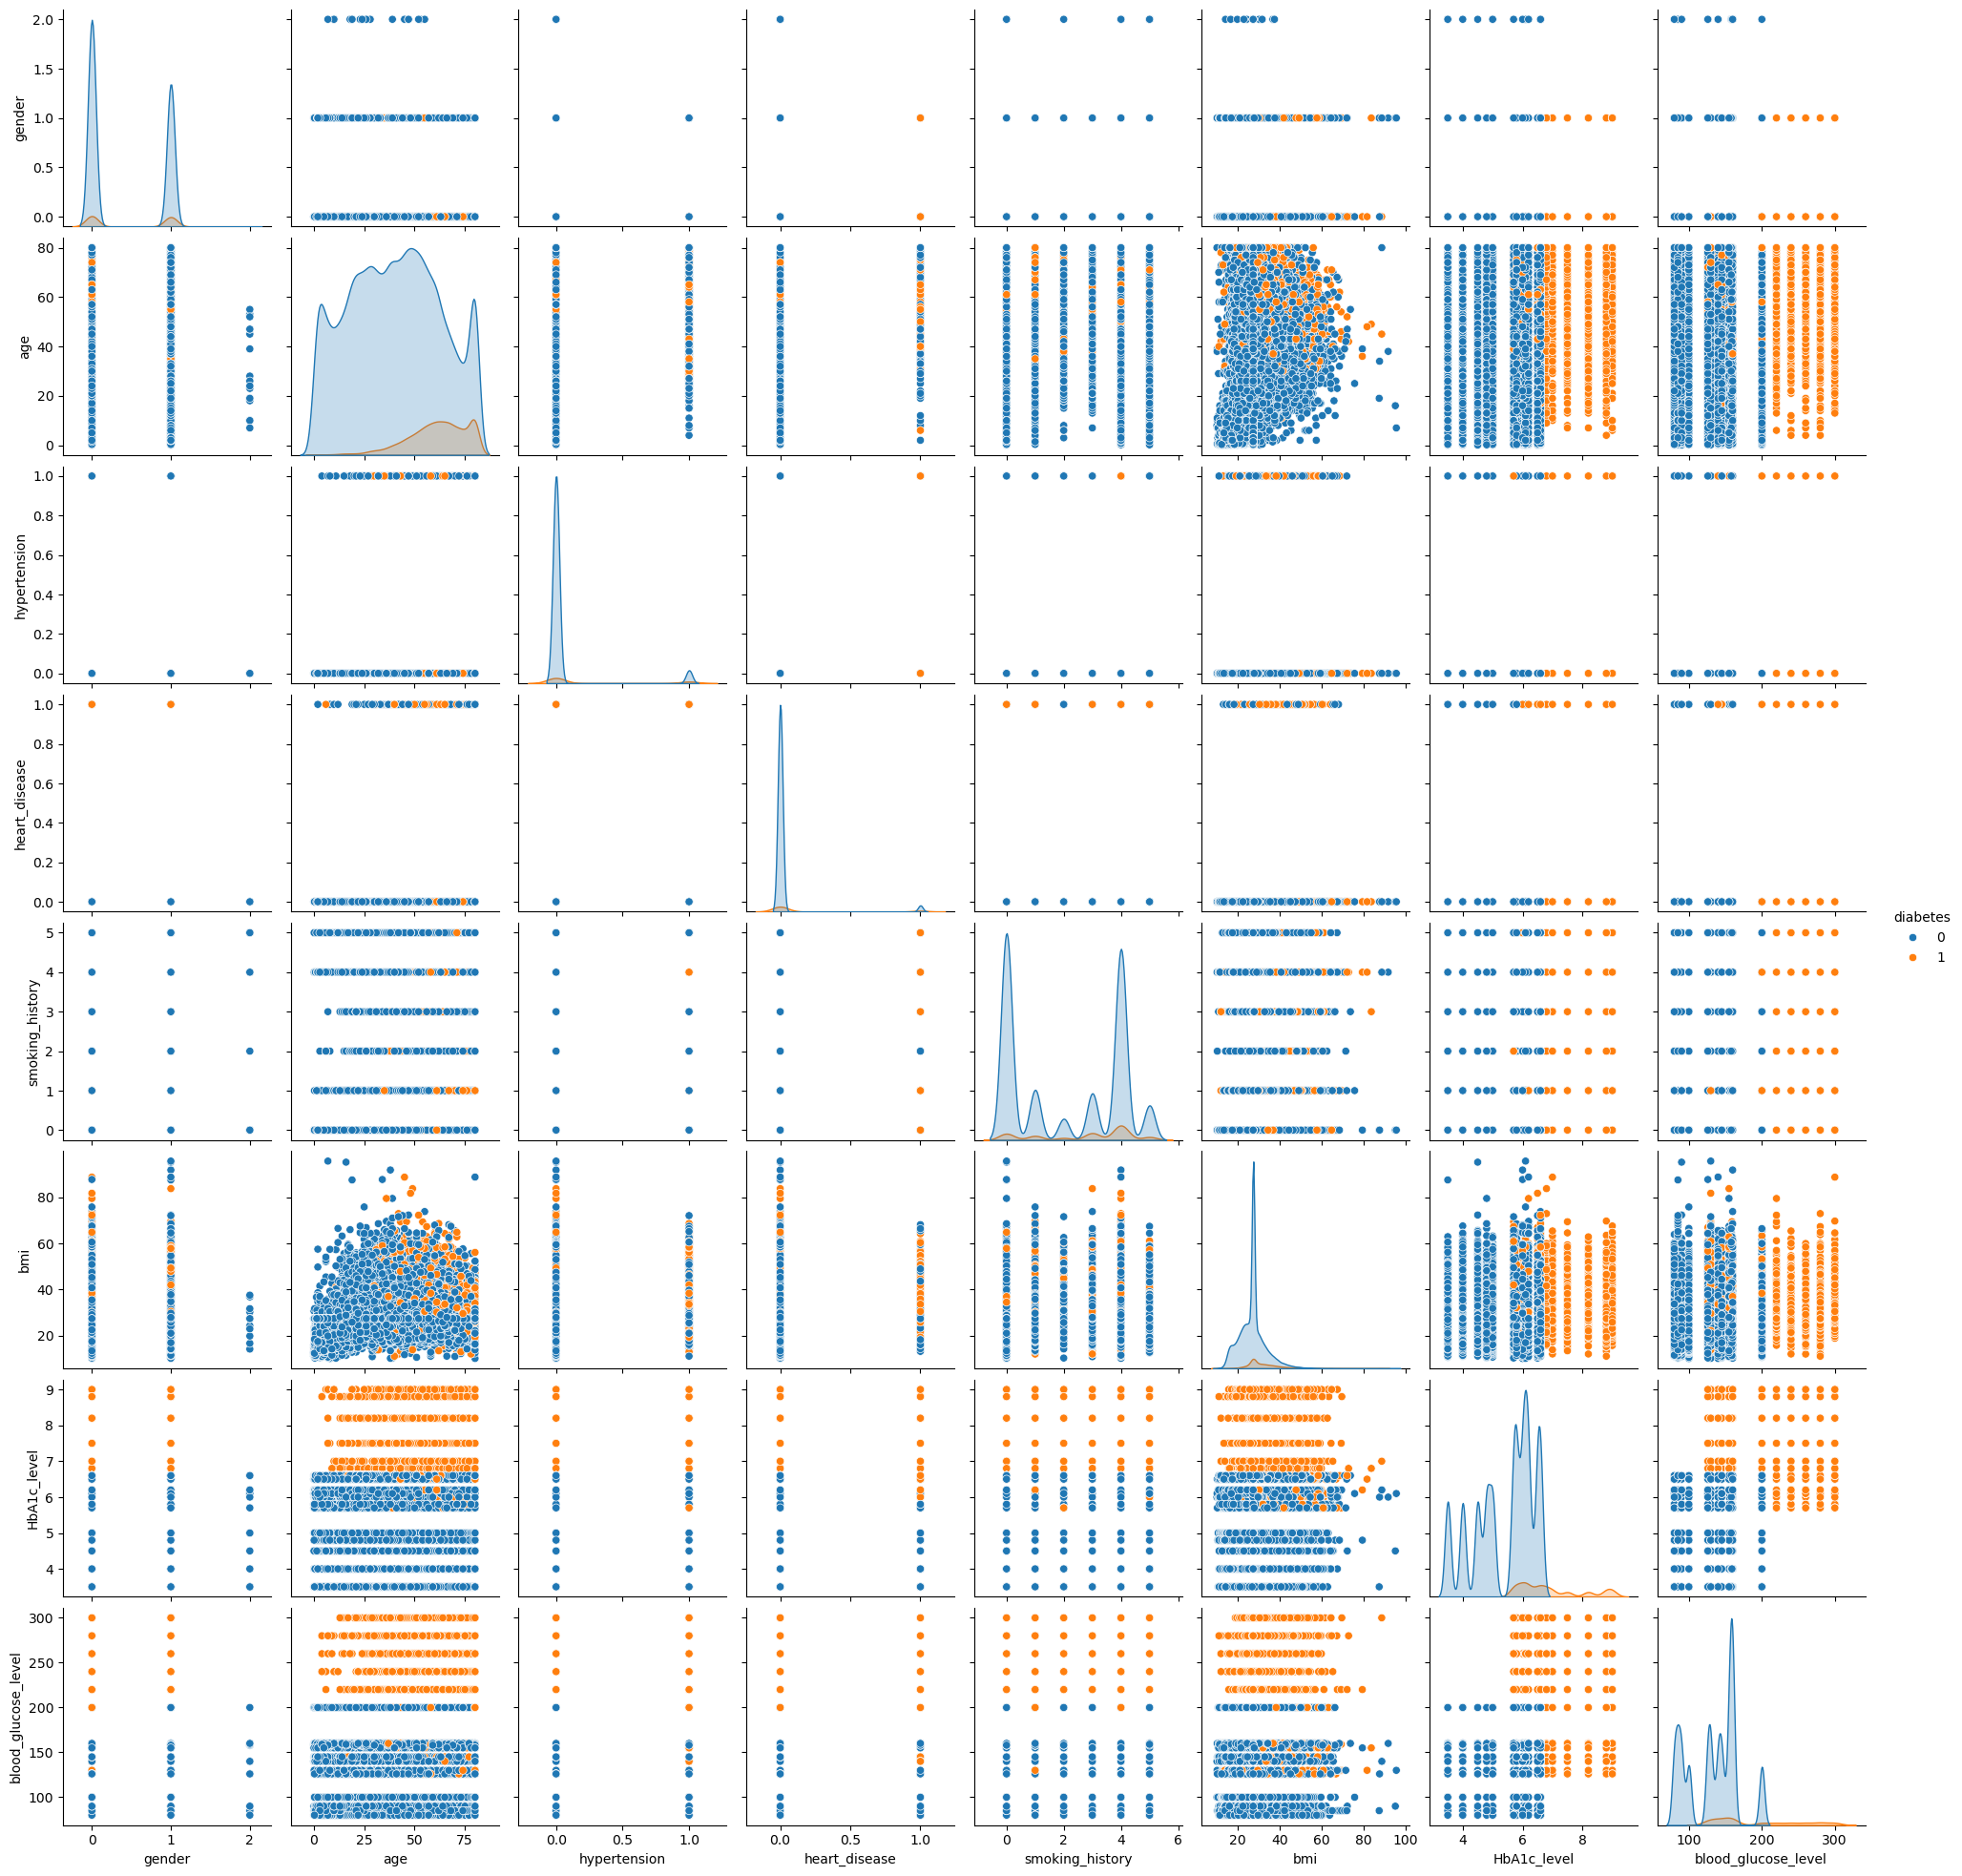

In [18]:
sns.pairplot(data=df, hue='diabetes', diag_kind='kde')

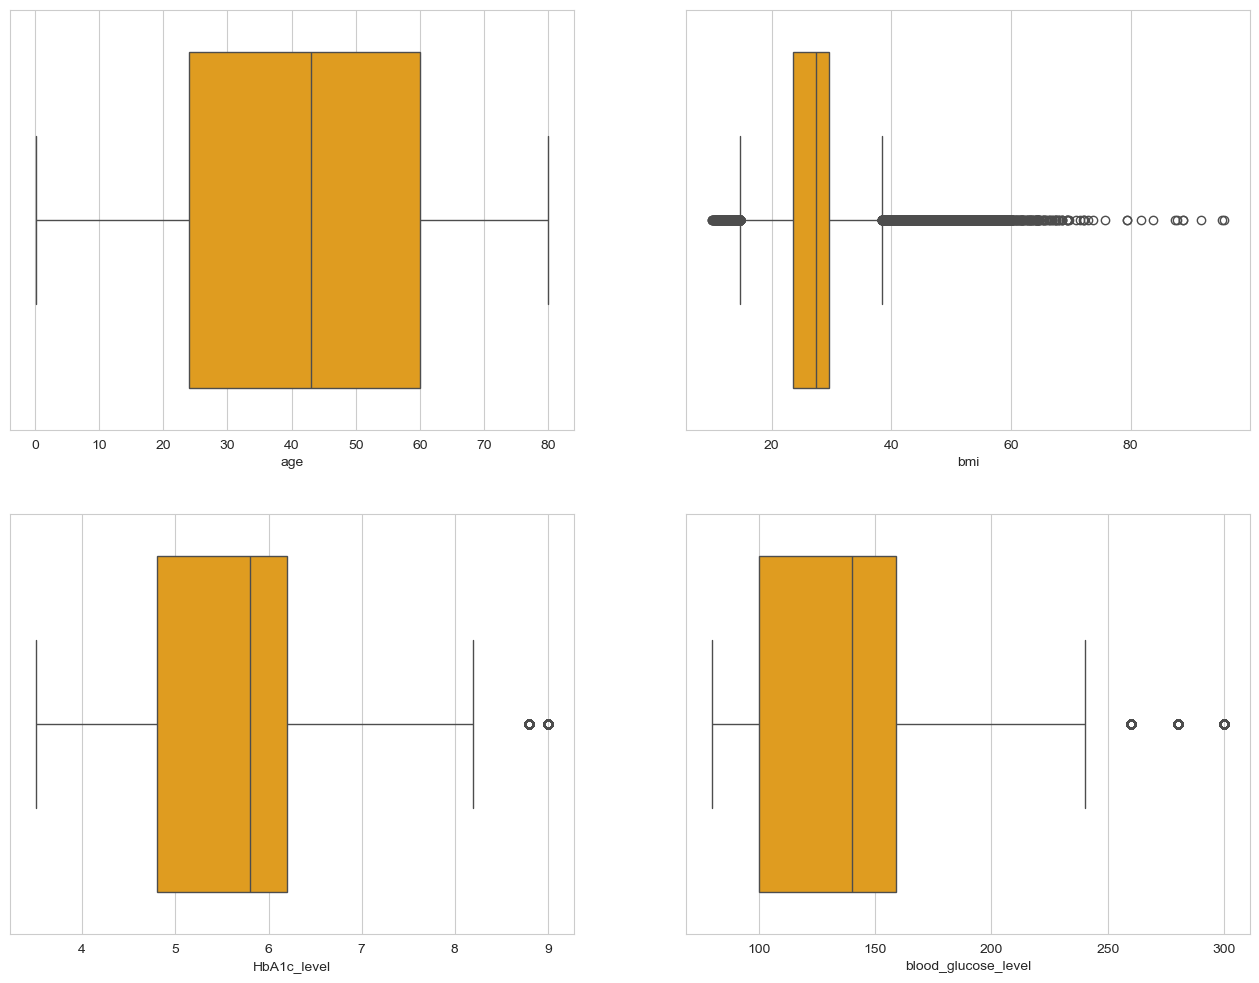

In [19]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(2,2,1)
sns.boxplot(x='age',data=df,color="orange")
plt.subplot(2,2,2)
sns.boxplot(x='bmi',data=df,color="orange")
plt.subplot(2,2,3)
sns.boxplot(x='HbA1c_level',data=df,color="orange")
plt.subplot(2,2,4)
sns.boxplot(x='blood_glucose_level',data=df,color="orange")
plt.show()

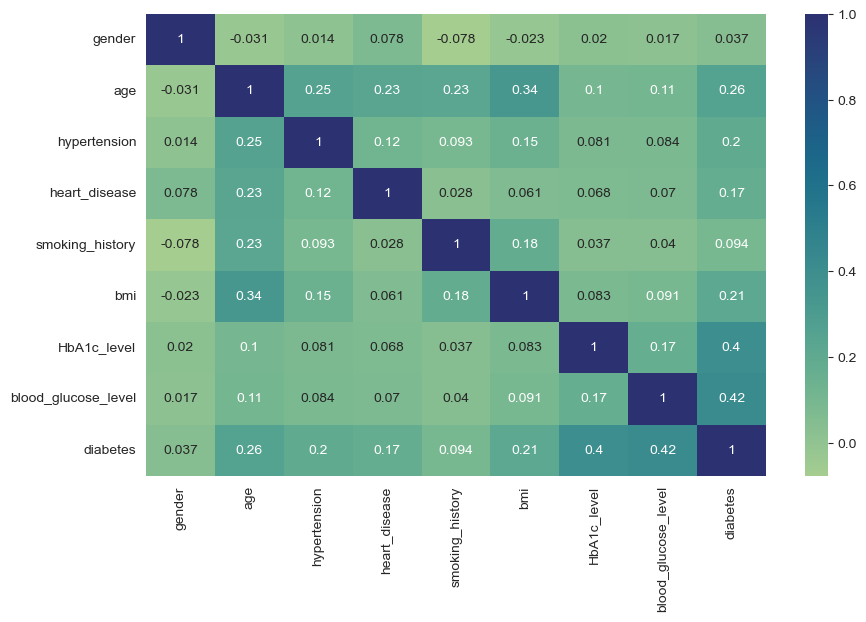

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="crest")
plt.show()

In [21]:
y=df['diabetes']

In [22]:
df=df.drop('diabetes',axis=1)
df=df.drop('gender',axis=1)
df=df.drop('smoking_history',axis=1)

In [23]:
X=df


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [25]:
print(X_train.shape,Y_train.shape, X_test.shape,Y_test.shape)

(80000, 6) (80000,) (20000, 6) (20000,)


In [26]:
# Reshape the input data
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

In [27]:
print(X_train_reshaped.shape)
print(X_test_reshaped.shape)

(80000, 1, 6)
(20000, 1, 6)


In [28]:
# Define the model-building function
def build_model(hp):
    model = Sequential()
    model.add(Bidirectional(GRU(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(1, X.shape[1]))))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

# Define the tuner and perform the hyperparameter search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=3,
    directory='my_dir',
    project_name='diabetes_prediction')


tuner.search(X_train_reshaped, Y_train, validation_split=0.1, epochs=8, batch_size=16)

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]


Trial 3 Complete [00h 03m 20s]
val_accuracy: 0.9636249939600626

Best val_accuracy So Far: 0.9636249939600626
Total elapsed time: 00h 14m 11s


In [29]:
# Training the model
history = best_model.fit(X_train_reshaped, Y_train, validation_split=0.1, epochs=16, batch_size=8, verbose=1)

Epoch 1/16


9000/9000 [==============================] - 29s 3ms/step - loss: 0.1291 - accuracy: 0.9564 - val_loss: 0.1598 - val_accuracy: 0.9394
Epoch 2/16
9000/9000 [==============================] - 28s 3ms/step - loss: 0.1270 - accuracy: 0.9569 - val_loss: 0.1179 - val_accuracy: 0.9616
Epoch 3/16
9000/9000 [==============================] - 28s 3ms/step - loss: 0.1256 - accuracy: 0.9580 - val_loss: 0.1267 - val_accuracy: 0.9567
Epoch 4/16
9000/9000 [==============================] - 28s 3ms/step - loss: 0.1368 - accuracy: 0.9564 - val_loss: 0.1219 - val_accuracy: 0.9561
Epoch 5/16
9000/9000 [==============================] - 28s 3ms/step - loss: 0.1280 - accuracy: 0.9577 - val_loss: 0.1173 - val_accuracy: 0.9614
Epoch 6/16
9000/9000 [==============================] - 28s 3ms/step - loss: 0.1354 - accuracy: 0.9573 - val_loss: 0.1158 - val_accuracy: 0.9655
Epoch 7/16
9000/9000 [==============================] - 28s 3ms/step - loss: 0.1252 - accuracy: 0.9579 - val_loss: 0.1116 - val_accuracy: 0.9

In [30]:
# Evaluate the model on the test data
loss, accuracy = best_model.evaluate(X_test_reshaped, Y_test)

print("Test accuracy:", accuracy)

# Plotting the training and validation accuracy over epochs
import matplotlib.pyplot as plt

# Retrieve the training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)


625/625 [==============================] - 1s 1ms/step - loss: 0.1129 - accuracy: 0.9585
Test accuracy: 0.958549976348877


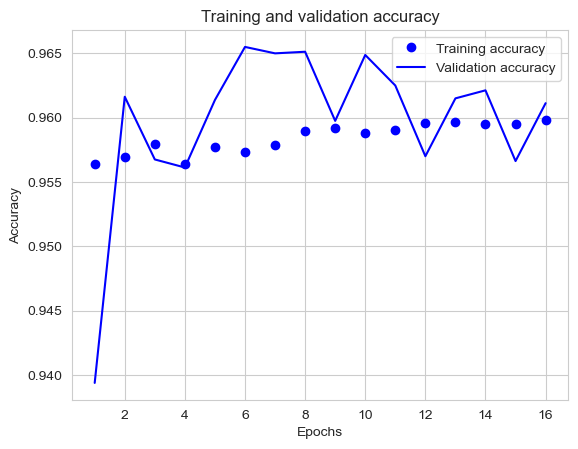

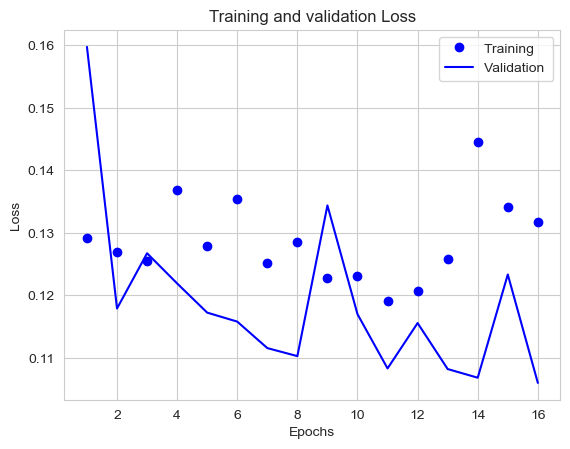

In [31]:
# Plotting the training and validation accuracy
plt.plot(epochs, training_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs,history.history['loss'] , 'bo', label='Training ')
plt.plot(epochs,history.history['val_loss'], 'b', label='Validation ')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
y_predicted = best_model.predict(X_test_reshaped)
y_predicted

625/625 [==============================] - 1s 1ms/step


array([[3.2421750e-12],
       [1.7636286e-01],
       [3.7446579e-25],
       ...,
       [9.3725525e-02],
       [9.0725413e-03],
       [4.4821696e-05]], dtype=float32)

In [33]:
#By adding the axis argument, numpy looks at the rows and columns individually.
#axis=0 means that the operation is performed across the rows of log_preds. ---> but column wise
#axis=1 means that the operation is performed across the columns of log_preds. ---> but row wise
#axis=-1 means that the operation is performed points horizontally across the columns.
y_pred = np.argmax(y_predicted, axis=-1) #from log probabilities to 0 or 1
print(y_pred)

[0 0 0 ... 0 0 0]


In [34]:
print("The Classification Report :-")
print(classification_report(Y_test,y_pred))

The Classification Report :-
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18252
           1       0.00      0.00      0.00      1748

    accuracy                           0.91     20000
   macro avg       0.46      0.50      0.48     20000
weighted avg       0.83      0.91      0.87     20000



In [35]:
input_data = (9,0,0,6,6.8,12.0)	
# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_reshaped.shape

(1, 6)

In [36]:
# reshape input to be [samples, time steps, features]
input_data_reshaped_gru = input_data_reshaped.reshape(input_data_reshaped.shape[0], 1, input_data_reshaped.shape[1])
input_data_reshaped_gru.shape



(1, 1, 6)

In [37]:
prediction = best_model.predict(input_data_reshaped_gru)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('No Diabetes')

else:
  print('Diabetes')

1/1 [==============================] - 0s 165ms/step
[[0.]]
[0]
No Diabetes
